In [82]:
# importing libraries and reading datasets
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

# Step 1: Data Cleaning, Inspection and exploration

In [83]:
# inspect the datasets
observations.head(), species_info.head()

(            scientific_name                            park_name  observations
 0        Vicia benghalensis  Great Smoky Mountains National Park            68
 1            Neovison vison  Great Smoky Mountains National Park            77
 2         Prunus subcordata               Yosemite National Park           138
 3      Abutilon theophrasti                  Bryce National Park            84
 4  Githopsis specularioides  Great Smoky Mountains National Park            85,
   category                scientific_name  \
 0   Mammal  Clethrionomys gapperi gapperi   
 1   Mammal                      Bos bison   
 2   Mammal                     Bos taurus   
 3   Mammal                     Ovis aries   
 4   Mammal                 Cervus elaphus   
 
                                         common_names conservation_status  
 0                           Gapper's Red-Backed Vole                 NaN  
 1                              American Bison, Bison                 NaN  
 2  Aurochs, 

In [84]:
# check datasets datatypes
species_info.dtypes, observations.dtypes

(category               object
 scientific_name        object
 common_names           object
 conservation_status    object
 dtype: object,
 scientific_name    object
 park_name          object
 observations        int64
 dtype: object)

In [85]:
# Check for null values
observations.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [86]:
species_info.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

# Step 2: Summary statistics

==>>>>   SUMMARY STATS FOR THE SPECIES DATASET

In [87]:
# Checking unique values in datasets
"Unique species:", species_info['scientific_name'].nunique()

('Unique species:', 5541)

In [88]:
# Number of unique categories (e.g., Mammal, Bird, etc.)
"Unique categories:", species_info['category'].nunique()

('Unique categories:', 7)

In [89]:
"Categories:", species_info['category'].value_counts()


('Categories:',
 category
 Vascular Plant       4470
 Bird                  521
 Nonvascular Plant     333
 Mammal                214
 Fish                  127
 Amphibian              80
 Reptile                79
 Name: count, dtype: int64)

In [90]:
species_info['conservation_status'].value_counts(dropna=False)

conservation_status
NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64

==>>>>   SUMMARY STATS FOR THE OBSERVATION DATASET

In [91]:
observations['observations'].sum()


3314739

In [92]:
# Most observed species
top_species = observations.groupby('scientific_name')['observations'].sum().sort_values(ascending=False)
print("\nTop 5 most observed species:\n\n", top_species.head())


Top 5 most observed species:

 scientific_name
Streptopelia decaocto    1785
Holcus lanatus           1780
Castor canadensis        1725
Hypochaeris radicata     1720
Puma concolor            1711
Name: observations, dtype: int64


In [93]:
# least observed species
least_species = top_species.tail()
print("\nBottom 5 least observed species:\n\n", least_species)


Bottom 5 least observed species:

 scientific_name
Rana sierrae           144
Noturus baileyi        143
Vermivora bachmanii    141
Canis rufus            137
Grus americana         131
Name: observations, dtype: int64


In [94]:
# Number of parks
print("\nUnique parks:", observations['park_name'].nunique())
print("Parks:\n", observations['park_name'].value_counts())


Unique parks: 4
Parks:
 park_name
Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: count, dtype: int64


===>>> MERGING DATASETS USING COMMON COLUMN 'scientific_name'

In [95]:
special_and_observations = pd.merge(species_info, observations, on='scientific_name')
special_and_observations.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128


# Step 3: Relationships Analyses

In [96]:
observations_by_park = special_and_observations.groupby(['park_name', 'conservation_status'])['observations'].sum().unstack()
print("\nObservations by Park and Conservation Status:")
print(observations_by_park)


Observations by Park and Conservation Status:
conservation_status                  Endangered  In Recovery  \
park_name                                                      
Bryce National Park                         619          388   
Great Smoky Mountains National Park         393          248   
Yellowstone National Park                  1558          889   
Yosemite National Park                      943          582   

conservation_status                  Species of Concern  Threatened  
park_name                                                            
Bryce National Park                               17011         591  
Great Smoky Mountains National Park               11735         440  
Yellowstone National Park                         40677        1459  
Yosemite National Park                            24539         849  


In [97]:
observation_by_category = special_and_observations.groupby(['category', 'conservation_status'])['observations'].sum().unstack()
print("\nObservations by Category and Conservation Status:")
print(observation_by_category)


Observations by Category and Conservation Status:
conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian                 144.0          NaN              2044.0       564.0
Bird                      574.0       1392.0             40758.0         NaN
Fish                      455.0          NaN              2109.0      1645.0
Mammal                   2178.0        715.0             21675.0       578.0
Nonvascular Plant           NaN          NaN              2705.0         NaN
Reptile                     NaN          NaN              2536.0         NaN
Vascular Plant            162.0          NaN             22135.0       552.0


In [98]:
total_observation_by_status = special_and_observations.groupby('conservation_status')['observations'].sum()
print("\nTotal Observations by Conservation Status:")
print(total_observation_by_status)


Total Observations by Conservation Status:
conservation_status
Endangered             3513
In Recovery            2107
Species of Concern    93962
Threatened             3339
Name: observations, dtype: int64


In [99]:
total_observation_by_category = special_and_observations.groupby('category')['observations'].sum()
print("\nTotal Observations by Category:")
print(total_observation_by_category)



Total Observations by Category:
category
Amphibian              45068
Bird                  332371
Fish                   72901
Mammal                163120
Nonvascular Plant     190653
Reptile                45822
Vascular Plant       2795312
Name: observations, dtype: int64


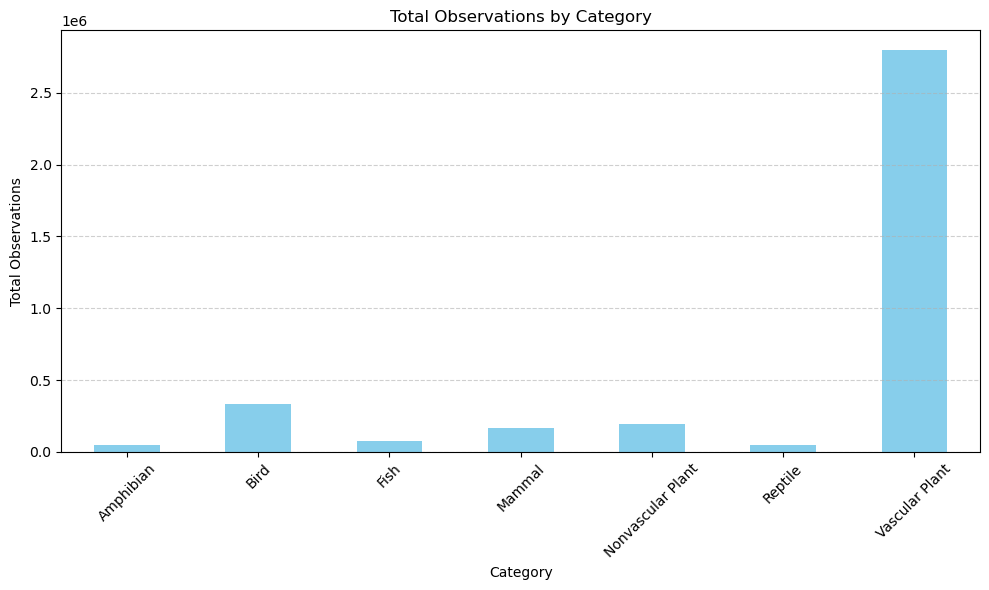

In [100]:

total_observation_by_category.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Adding title and labels
plt.title('Total Observations by Category')
plt.ylabel('Total Observations')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# Step 4: Conservative Analyses

In [101]:
species_status_count = species_info['conservation_status'].value_counts(dropna=False)
print("Species Count by Conservation Status:\n", species_status_count)


Species Count by Conservation Status:
 conservation_status
NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64


In [102]:
species_info['conservation_status'] = species_info['conservation_status'].fillna('No Intervention')


In [103]:
species_info['is_protected'] = species_info['conservation_status'] != 'No Intervention'

protection_counts = species_info.groupby('category')['is_protected'].sum()
total_counts = species_info.groupby('category')['is_protected'].count()

protection_df = pd.DataFrame({
    'total': total_counts,
    'protected': protection_counts,
})

protection_df['percent_protected'] = 100 * protection_df['protected'] / protection_df['total']
print("\nProtection by Category:\n", protection_df)



Protection by Category:
                    total  protected  percent_protected
category                                              
Amphibian             80          7           8.750000
Bird                 521         79          15.163148
Fish                 127         11           8.661417
Mammal               214         38          17.757009
Nonvascular Plant    333          5           1.501502
Reptile               79          5           6.329114
Vascular Plant      4470         46           1.029083


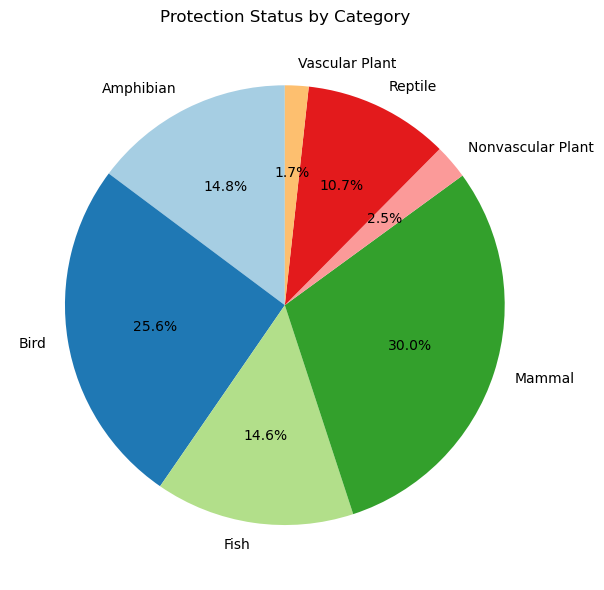

In [119]:
plt.figure(figsize=(8, 6))

# Plotting the pie chart for each category's protected percentage
protection_df['percent_protected'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False, colors=plt.cm.Paired.colors)

# Adding title
plt.title('Protection Status by Category')
plt.ylabel('')  # Remove the y-label to clean up the chart

plt.tight_layout()
plt.show()

In [104]:
# Get only Mammal and Bird data
contingency_df = protection_df.loc[['Mammal', 'Bird']][['protected', 'total']]
contingency_df['not_protected'] = contingency_df['total'] - contingency_df['protected']

# create table
contingency_table = contingency_df[['protected', 'not_protected']].values
print("Contingency Table:\n", contingency_table)

Contingency Table:
 [[ 38 176]
 [ 79 442]]


In [105]:
chi2, pval, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-squared statistic: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {round(pval ,2)}")
print("\nExpected Frequencies:\n", expected)


Chi-squared statistic: 0.5810483277947567
Degrees of freedom: 1
P-value: 0.45

Expected Frequencies:
 [[ 34.06530612 179.93469388]
 [ 82.93469388 438.06530612]]


In [106]:
# considering the p value we can say that 
# If p-value < 0.05 → Significant association: Mammals and Birds differ in protection rates.
# If p-value ≥ 0.05 → No significant difference in protection rates.

In [107]:
# with a p value of .45 we can safely assume there's no statistically significant diffrence in the protection rates of mammals and birds

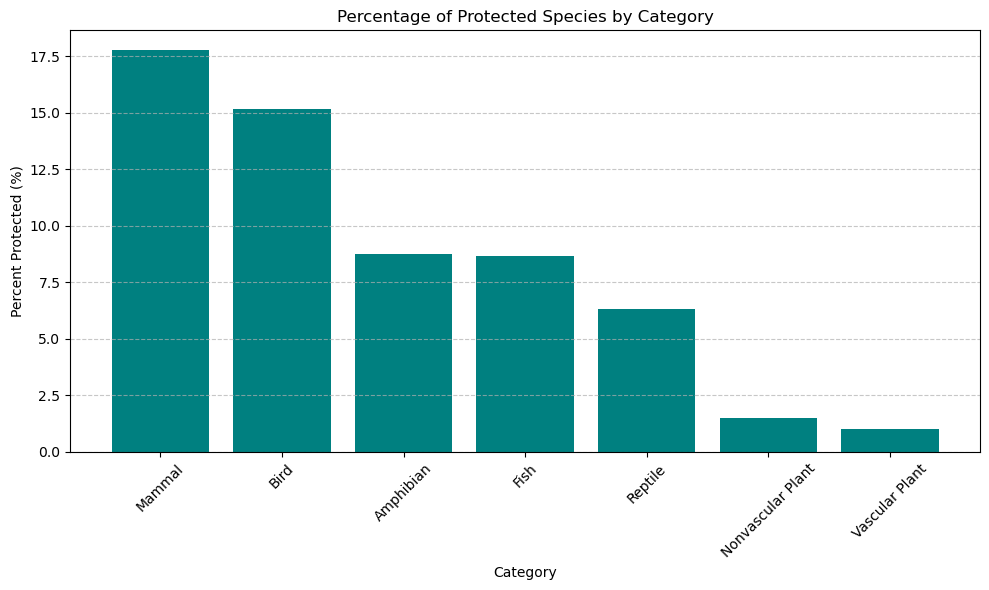

In [108]:

# Sort by percent_protected for cleaner visualization
protection_df_sorted = protection_df.sort_values('percent_protected', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(protection_df_sorted.index, protection_df_sorted['percent_protected'], color='teal')

plt.title('Percentage of Protected Species by Category')
plt.ylabel('Percent Protected (%)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Step 6: Analyses Observations by park

In [109]:
# Merge datasets
merged_df = observations.merge(species_info, how='left', on='scientific_name')

merged_df.head()


,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention,False
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Intervention,False
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Intervention,False


In [110]:
obs_by_park = merged_df.groupby(['park_name', 'conservation_status'])['observations'].sum().unstack().fillna(0)

obs_by_park


conservation_status,Endangered,In Recovery,No Intervention,Species of Concern,Threatened
park_name,,,,,
Bryce National Park,619,388,614682,17011,591
Great Smoky Mountains National Park,393,248,462047,11735,440
Yellowstone National Park,1558,889,1543058,40677,1459
Yosemite National Park,943,582,922539,24539,849


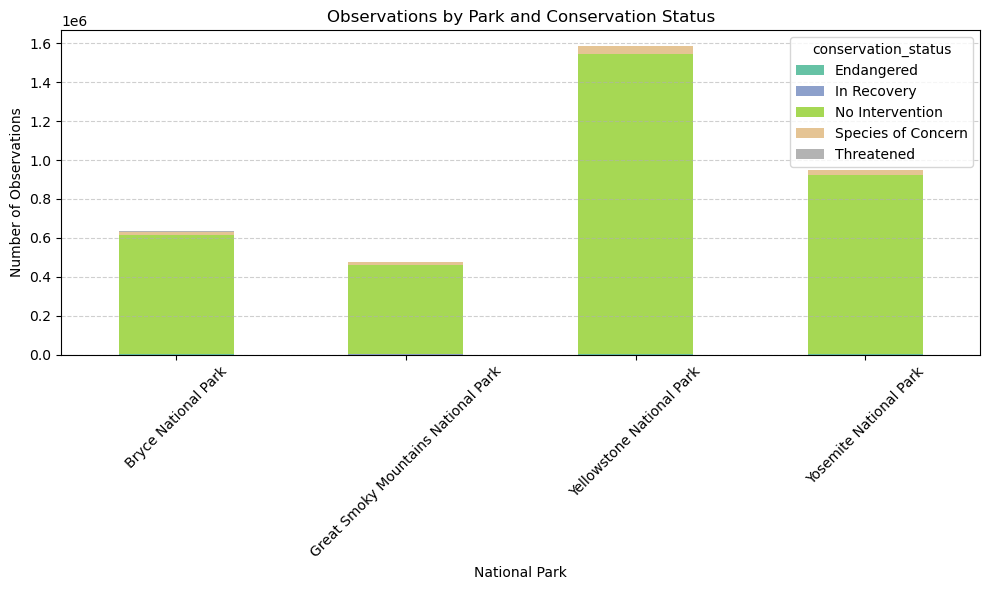

In [111]:
obs_by_park.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Observations by Park and Conservation Status')
plt.ylabel('Number of Observations')
plt.xlabel('National Park')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [112]:
# Filtering to just threatened and endagered species
at_risk = merged_df[merged_df['conservation_status'].isin(['Threatened', 'Endangered'])]

# Group by park and sum observations
at_risk_obs_by_park = at_risk.groupby('park_name')['observations'].sum().reset_index()

# Preview
at_risk_obs_by_park

,park_name,observations
0,Bryce National Park,1210
1,Great Smoky Mountains National Park,833
2,Yellowstone National Park,3017
3,Yosemite National Park,1792


In [113]:
# Percentage calculations on "protections" Observations
# Tag each species as protected or not
merged_df['is_protected'] = merged_df['conservation_status'].notnull()

# Total observations per park
total_obs = merged_df.groupby('park_name')['observations'].sum()

# Protected observations per park
protected_obs = merged_df[merged_df['is_protected']].groupby('park_name')['observations'].sum()

# Calculate percentage
percent_protected_obs = (protected_obs / total_obs * 100).reset_index()
percent_protected_obs.columns = ['park_name', 'percent_protected_observations']

percent_protected_obs

,park_name,percent_protected_observations
0,Bryce National Park,100.0
1,Great Smoky Mountains National Park,100.0
2,Yellowstone National Park,100.0
3,Yosemite National Park,100.0


# Step 7:  Examining Relationships Between Species Categories and Protection Status

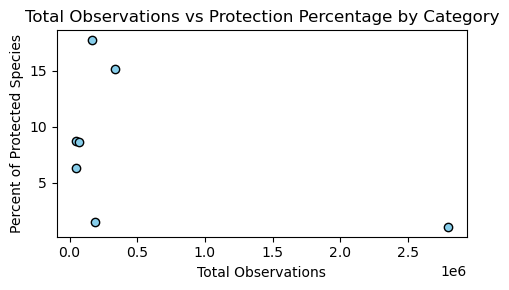

In [122]:
# Combine total observations and protection percentages into one DataFrame
merged_df = protection_df.merge(total_observation_by_category, left_index=True, right_index=True)
merged_df.columns = ['protected', 'total', 'percent_protected', 'total_observations']

# Scatter plot: Total Observations vs Protection Percentage
plt.figure(figsize=(5, 3))
plt.scatter(merged_df['total_observations'], merged_df['percent_protected'], color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Total Observations vs Protection Percentage by Category')
plt.xlabel('Total Observations')
plt.ylabel('Percent of Protected Species')
plt.tight_layout()
plt.show()
